**Chapter 10 – Introduction to Artificial Neural Networks**

_This notebook contains all the sample code and solutions to the exercices in chapter 10._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

In [3]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

Saving figure perceptron_iris_plot


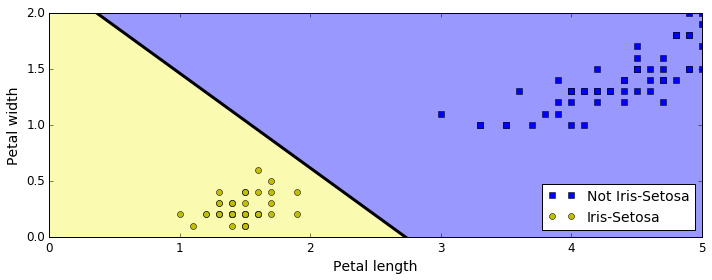

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


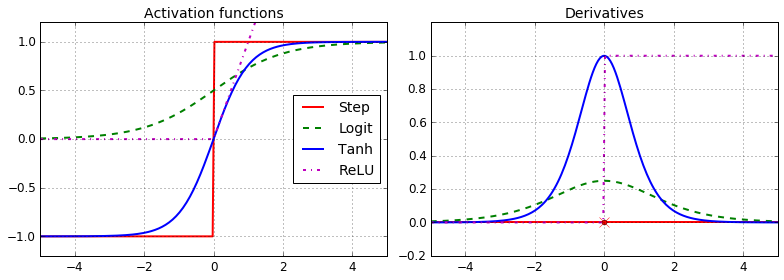

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

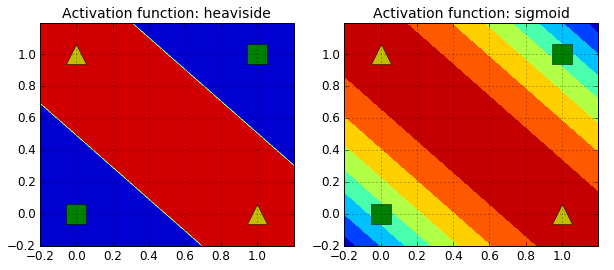

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST

## using tf.learn

In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [10]:
import tensorflow as tf

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10,
                                         feature_columns=feature_columns)
dnn_clf.fit(x=X_train, y=y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_evaluation_master': '', '_num_ps_replicas': 0, '_environment': 'local', '_master': '', '_save_checkpoints_secs': 600, '_is_chief': True, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_keep_checkpoint_every_n_hours': 10000, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f002688fdd8>, '_save_checkpoints_steps': None, '_task_id': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_tf_random_seed': None, '_save_summary_steps': 100}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y 

/home/ageron/dev/py/envs/ml/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp7zss569e/model.ckpt.
INFO:tensorflow:loss = 2.33582, step = 1
INFO:tensorflow:global_step/sec: 232.736
INFO:tensorflow:loss = 0.27437, step = 101
INFO:tensorflow:global_step/sec: 241.055
INFO:tensorflow:loss = 0.269322, step = 201
INFO:tensorflow:global_step/sec: 226.091
INFO:tensorflow:loss = 0.38457, step = 301
INFO:tensorflow:global_step/sec: 208.719
INFO:tensorflow:loss = 0.260778, step = 401
INFO:tensorflow:global_step/sec: 214.101
INFO:tensorflow:loss = 0.248095, step = 501
INFO:tensorflow:global_step/sec: 183.667
INFO:tensorflow:loss = 0.0638462, step = 601
INFO:tensorflow:global_step/sec: 202.389
INFO:tensorflow:loss = 0.142341, step = 701
INFO:tensorflow:global_step/sec: 196.715
INFO:tensorflow:loss = 0.189448, step = 801
INFO:tensorflow:global_step/sec: 162.115
INFO:tensorflow:loss = 0.0936472, step = 901
INFO:tensorflow:global_step/sec: 179.778
INFO:tensorflow:loss = 0.219577, step = 1001
INFO:tensorflow:global_step/sec: 

DNNClassifier(params={'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None),), 'embedding_lr_multipliers': None, 'hidden_units': [300, 100], 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f002245e518>, 'dropout': None, 'activation_fn': <function relu at 0x7f0025af6e18>, 'optimizer': None, 'input_layer_min_slice_size': None, 'gradient_clip_norm': None})

In [11]:
from sklearn.metrics import accuracy_score

y_pred = list(dnn_clf.predict(X_test))
accuracy = accuracy_score(y_test, y_pred)
accuracy

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


/home/ageron/dev/py/envs/ml/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


0.98329999999999995

In [12]:
from sklearn.metrics import log_loss

y_pred_proba = list(dnn_clf.predict_proba(X_test))
log_loss(y_test, y_pred_proba)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


/home/ageron/dev/py/envs/ml/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


0.071601274010499413

In [13]:
dnn_clf.evaluate(X_test, y_test)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.


/home/ageron/dev/py/envs/ml/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Starting evaluation at 2017-04-28-07:20:59
INFO:tensorflow:Finished evaluation at 2017-04-28-07:21:00
INFO:tensorflow:Saving dict for global step 40000: accuracy = 0.9833, auc = 0.997642, global_step = 40000, loss = 0.0716011


{'accuracy': 0.98329997,
 'auc': 0.99764204,
 'global_step': 40000,
 'loss': 0.071601115}

## Using plain TensorFlow

In [14]:
import tensorflow as tf

def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 1 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        Z = tf.matmul(X, W) + b
        if activation=="relu":
            return tf.nn.relu(Z)
        else:
            return Z

In [15]:
tf.reset_default_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, "hidden1", activation="relu")
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation="relu")
    logits = neuron_layer(hidden2, n_outputs, "output")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [16]:
n_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.96 Test accuracy: 0.8803
1 Train accuracy: 0.88 Test accuracy: 0.908
2 Train accuracy: 0.92 Test accuracy: 0.9187
3 Train accuracy: 0.9 Test accuracy: 0.925
4 Train accuracy: 0.96 Test accuracy: 0.9314
5 Train accuracy: 0.92 Test accuracy: 0.937
6 Train accuracy: 0.94 Test accuracy: 0.9403
7 Train accuracy: 0.94 Test accuracy: 0.9453
8 Train accuracy: 0.94 Test accuracy: 0.9488
9 Train accuracy: 0.9 Test accuracy: 0.9517
10 Train accuracy: 0.96 Test accuracy: 0.9541
11 Train accuracy: 0.98 Test accuracy: 0.9554
12 Train accuracy: 0.92 Test accuracy: 0.9596
13 Train accuracy: 0.98 Test accuracy: 0.9607
14 Train accuracy: 0.92 Test accuracy: 0.9624
15 Train accuracy: 1.0 Test accuracy: 0.964
16 Train accuracy: 1.0 Test accuracy: 0.9656
17 Train accuracy: 0.98 Test accuracy: 0.9656
18 Train accuracy: 0.96 Test accuracy: 0.9664
19 Train accuracy: 1.0 Test accuracy: 0.9684


In [17]:
with tf.Session() as sess:
    saver.restore(sess, save_path) #"my_model_final.ckpt")
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    print(np.argmax(Z, axis=1))
    print(mnist.test.labels[:20])

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [18]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [19]:
show_graph(tf.get_default_graph())

## Using `dense()` instead of `neuron_layer()`

Note: the book uses `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [20]:
tf.reset_default_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [21]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.96 Test accuracy: 0.9054
1 Train accuracy: 0.92 Test accuracy: 0.9219
2 Train accuracy: 0.92 Test accuracy: 0.9298
3 Train accuracy: 0.98 Test accuracy: 0.9365
4 Train accuracy: 0.92 Test accuracy: 0.9401
5 Train accuracy: 0.98 Test accuracy: 0.9459
6 Train accuracy: 0.96 Test accuracy: 0.9503
7 Train accuracy: 0.98 Test accuracy: 0.9536
8 Train accuracy: 1.0 Test accuracy: 0.9567
9 Train accuracy: 0.94 Test accuracy: 0.9577
10 Train accuracy: 0.98 Test accuracy: 0.9599
11 Train accuracy: 1.0 Test accuracy: 0.9632
12 Train accuracy: 1.0 Test accuracy: 0.9638
13 Train accuracy: 1.0 Test accuracy: 0.9656
14 Train accuracy: 0.98 Test accuracy: 0.9666
15 Train accuracy: 0.98 Test accuracy: 0.9667
16 Train accuracy: 1.0 Test accuracy: 0.9679
17 Train accuracy: 1.0 Test accuracy: 0.9678
18 Train accuracy: 0.94 Test accuracy: 0.9699
19 Train accuracy: 0.98 Test accuracy: 0.9712


In [22]:
show_graph(tf.get_default_graph())

# Exercise solutions

**Coming soon**